In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

In [53]:
data = pd.read_csv('availability.csv')
data

,ID,nom,coordinates,communes,capacity,availability_bike,unavailable_duration,unavailable_count
0,10001,René Boulanger - Lancry,"48.8685433, 2.3600032",Paris 10e Arrondissement,62,11.041379,0,0
1,10003,Hauteville - Bonne Nouvelle,"48.87077436024, 2.3496496368327",Paris 10e Arrondissement,17,9.724832,0,0
2,10004,Metz - Faubourg Saint-Denis,"48.870893, 2.353521",Paris 10e Arrondissement,48,14.925764,0,0
3,10005,Petites Ecuries - Faubourg Poissonnière,"48.87397217237368, 2.348388757504776",Paris 10e Arrondissement,17,8.131250,0,0
4,10006,Petites Ecuries - Faubourg Saint-Denis,"48.87287120589831, 2.3542150855064397",Paris 10e Arrondissement,28,8.791469,0,0
...,...,...,...,...,...,...,...,...
1427,92004,Nanterre - Université,"48.901365, 2.212693",Nanterre,20,16.589286,0,0
1428,92005,Gare de Nanterre Ville,"48.8950295, 2.1957932",Nanterre,43,17.666667,0,0
1429,92006,Place Nelson Mandela,"48.897874318180556, 2.2182820737361912",Nanterre,30,6.500000,0,0
1430,92007,Pesaro - Préfecture,"48.89577046284005, 2.223908342421055",Nanterre,22,5.896552,61,1


# EDA

In [3]:
data.shape

(1432, 8)

In [4]:
data.nunique()

ID                      1432
nom                     1430
coordinates             1432
communes                  81
capacity                  61
availability_bike       1407
unavailable_duration      97
unavailable_count          7
dtype: int64

In [5]:
data.isna().any()

ID                      False
nom                     False
coordinates             False
communes                False
capacity                False
availability_bike       False
unavailable_duration    False
unavailable_count       False
dtype: bool

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1432 entries, 0 to 1431
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    1432 non-null   int64  
 1   nom                   1432 non-null   object 
 2   coordinates           1432 non-null   object 
 3   communes              1432 non-null   object 
 4   capacity              1432 non-null   int64  
 5   availability_bike     1432 non-null   float64
 6   unavailable_duration  1432 non-null   int64  
 7   unavailable_count     1432 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 89.6+ KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1432.0,18599.208799,12160.851346,1001.0,11025.750000,16109.000000,21953.250000,92008.000000
capacity,1432.0,31.525140,11.575206,11.0,23.000000,30.000000,37.000000,74.000000
availability_bike,1432.0,12.431733,9.261040,0.0,5.874672,10.088889,16.046461,75.380531
unavailable_duration,1432.0,34.650140,100.560893,0.0,0.000000,0.000000,0.000000,1022.000000
unavailable_count,1432.0,0.372905,0.797826,0.0,0.000000,0.000000,0.000000,6.000000


# Cleaning Numerical Data

In [10]:
numerical = data.select_dtypes(include=np.number)
numerical = numerical.drop('ID',axis=1)

In [11]:
#for col in numerical.columns:
#    sns.displot(numerical[col], kde=True)
#    plt.show()

/Users/iremnisa.kilinc/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


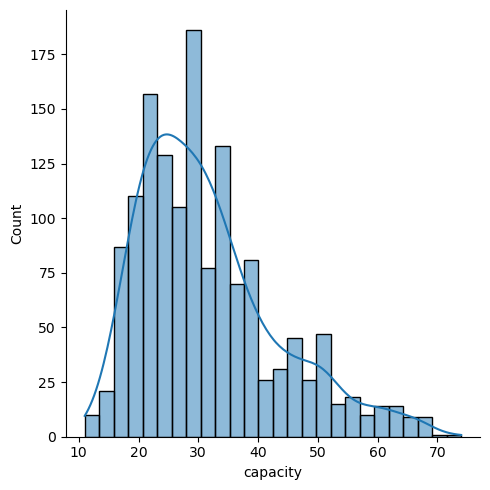

/Users/iremnisa.kilinc/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


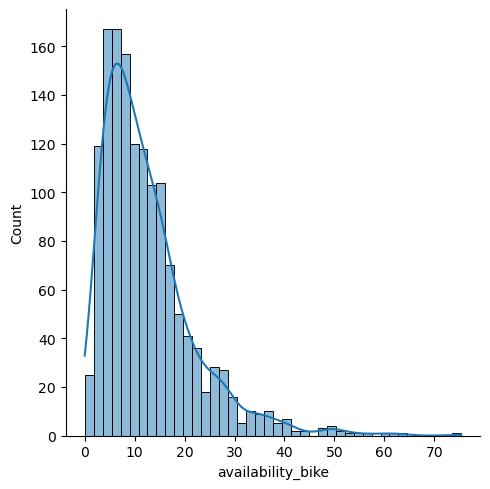

/Users/iremnisa.kilinc/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


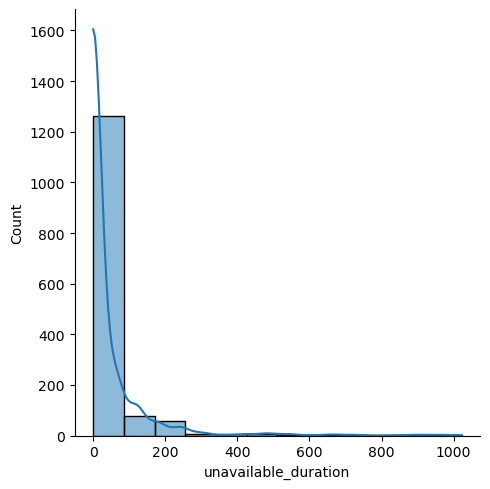

/Users/iremnisa.kilinc/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


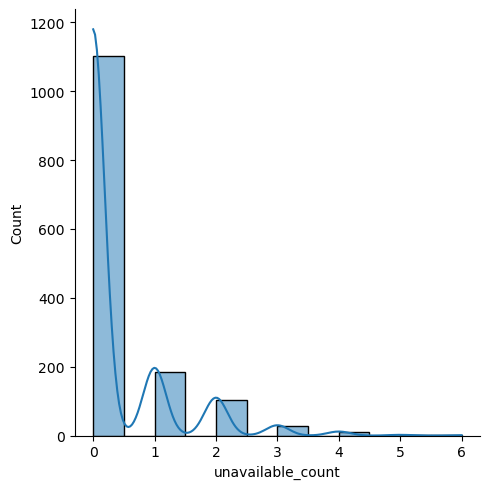

In [12]:
def plot_num(Dataframe):
    for column in Dataframe.columns:
        sns.displot(x=Dataframe[column],kde=True)
        plt.show()
    return None
   

plot_num(numerical)

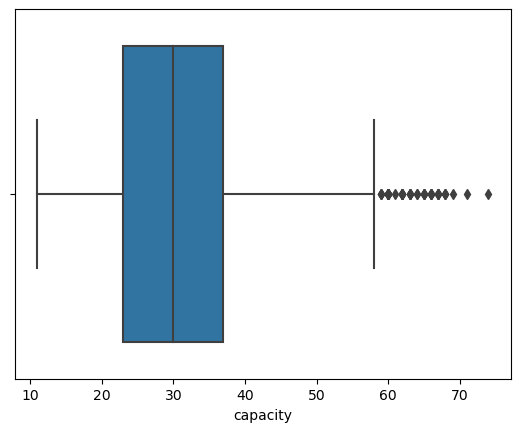

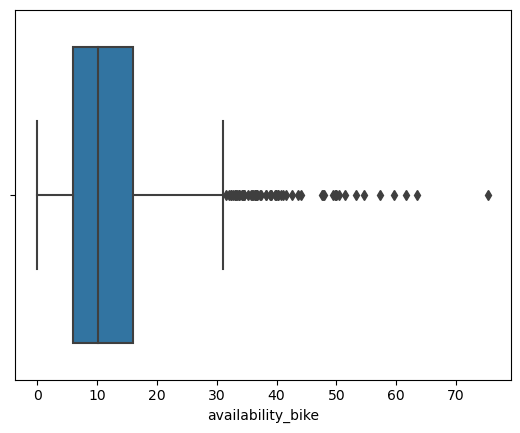

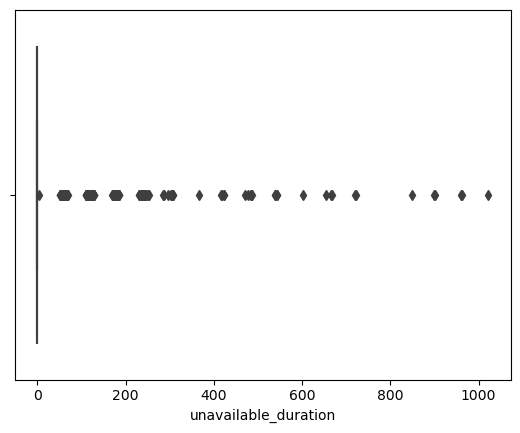

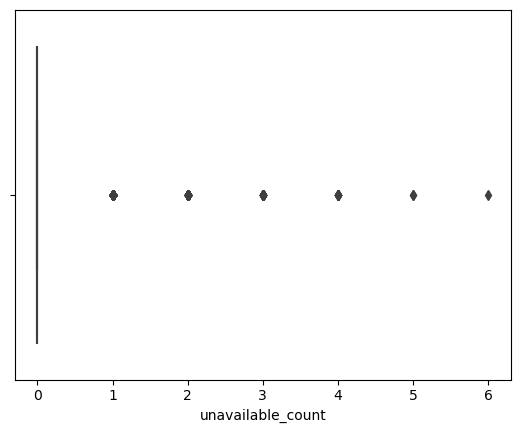

In [13]:
for column in numerical.columns:
        sns.boxplot(x=numerical[column])
        plt.show()

 #not too many outliers  

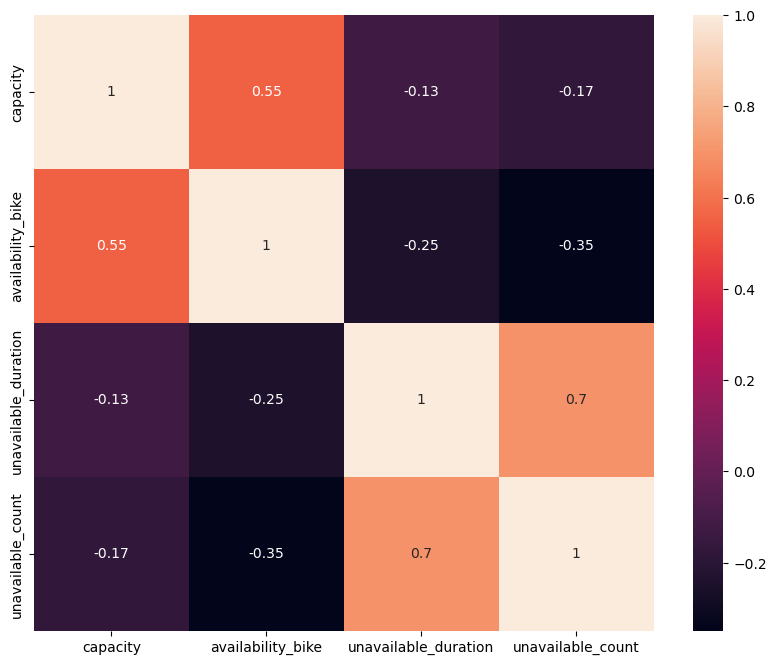

,capacity,availability_bike,unavailable_duration,unavailable_count
capacity,1.000000,0.550511,-0.126528,-0.174981
availability_bike,0.550511,1.000000,-0.248204,-0.350063
unavailable_duration,-0.126528,-0.248204,1.000000,0.697765
unavailable_count,-0.174981,-0.350063,0.697765,1.000000


In [54]:
corr_matrix=numerical.corr() 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

corr_matrix

In [14]:
numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity,1432.0,31.525140,11.575206,11.0,23.000000,30.000000,37.000000,74.000000
availability_bike,1432.0,12.431733,9.261040,0.0,5.874672,10.088889,16.046461,75.380531
unavailable_duration,1432.0,34.650140,100.560893,0.0,0.000000,0.000000,0.000000,1022.000000
unavailable_count,1432.0,0.372905,0.797826,0.0,0.000000,0.000000,0.000000,6.000000


In [15]:
def value_count(df):
    for columns in df:
            print (len(numerical[columns].value_counts()),':  ',columns)
    return

value_count(numerical)
        

61 :   capacity
1407 :   availability_bike
97 :   unavailable_duration
7 :   unavailable_count


In [16]:
def outliers(column, threshold = 3):
   
    data = column[abs(column.apply(lambda x: (x - column.mean()) / column.var() ** (1/2))) > threshold]
    
    return data

In [17]:
duration_outliers = outliers(numerical["unavailable_duration"])
len(duration_outliers)

27

In [18]:
count_outliers = outliers(numerical["unavailable_count"])
len(count_outliers)

42

In [19]:
def discrete_continuous(df):
    discrete_lst = []
    continuous_lst = []
    for col in df.columns:
        if len(df[col].unique()) < (df.shape[0] * 0.02):
            discrete_lst.append(col)
        else:
            continuous_lst.append(col)
    return (discrete_lst, continuous_lst)
   
        

In [20]:
discrete_lst, continuous_lst = discrete_continuous(numerical)

In [21]:
print('Discrete List:  ',discrete_lst)
print('Continuous List:   ',continuous_lst)

Discrete List:   ['unavailable_count']
Continuous List:    ['capacity', 'availability_bike', 'unavailable_duration']


In [22]:
num_discrete_df = numerical[['unavailable_count','capacity']]
num_continuous_df = numerical[['availability_bike', 'unavailable_duration']]

# Cleaning Categorical Data

In [24]:
categorical=data.select_dtypes(include=object)

In [25]:
categorical.nunique()

nom            1430
coordinates    1432
communes         81
dtype: int64

In [30]:
categorical = categorical.drop(['nom','coordinates'],axis=1)

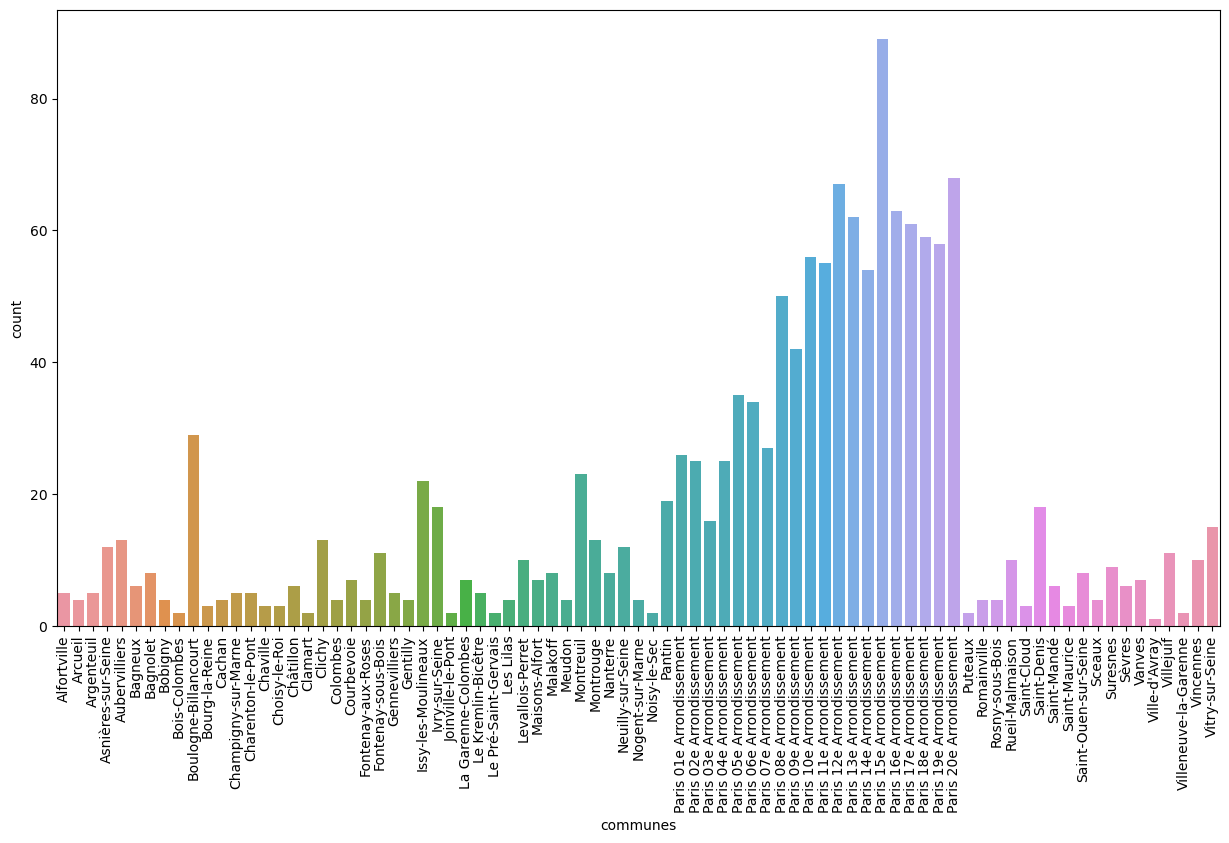

In [52]:
ordered_categories = categorical['communes'].sort_values().unique()
plt.figure(figsize=(15, 8))
sns.countplot(x=categorical['communes'], order=ordered_categories)
plt.xticks(rotation=90) 
plt.show()

In [14]:
y = data['unavailable_duration']
X = data.drop('unavailable_duration', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_num = data.select_dtypes(include = np.number)
X_cat = data.select_dtypes(include = object)

transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
x_norm = pd.DataFrame(x_normalized, columns=X_num.columns)
x_norm.head()

In [8]:
data[data['capacity']==data['capacity'].max()]

,ID,nom,coordinates,communes,capacity,availability_bike,unavailable_duration,unavailable_count
348,15030,Emeriau - Beaugrenelle,"48.84791249714942, 2.2843059897422795",Paris 15e Arrondissement,74,63.424731,0,0


In [9]:
data[data['availability_bike']==data['availability_bike'].max()]

,ID,nom,coordinates,communes,capacity,availability_bike,unavailable_duration,unavailable_count
186,12127,Tremblay - Lac des Minimes,"48.834131261494, 2.4547516554594",Paris 12e Arrondissement,48,75.380531,0,0


In [83]:
dfff = pd.read_csv('velibs_export_2024-02-13_10:44.csv')
dfff

,identifiant_station,nom_station,station_en_fonctionnement,capacité_de_la_station,nombre_bornettes_libres,nombre_total_vélos_disponibles,vélos_mécaniques_disponibles,vélos_électriques_disponibles,borne_de_paiement_disponible,retour_vélib_possible,actualisation_de_la_donnée,coordonnées_géographiques,nom_communes_équipées,code_insee_communes_équipées
0,44015,Rouget de L'isle - Watteau,OUI,20.0,10.0,10.0,5.0,5.0,OUI,OUI,2024-02-12T12:59:40+01:00,"48.778192750803, 2.3963020229163",Vitry-sur-Seine,NaN
1,16107,Benjamin Godard - Victor Hugo,OUI,35.0,30.0,5.0,0.0,5.0,OUI,OUI,2024-02-12T12:54:31+01:00,"48.865983, 2.275725",Paris,NaN
2,9020,Toudouze - Clauzel,OUI,21.0,20.0,1.0,0.0,1.0,OUI,OUI,2024-02-12T12:59:10+01:00,"48.87929591733507, 2.3373600840568547",Paris,NaN
3,31104,Mairie de Rosny-sous-Bois,OUI,30.0,19.0,9.0,2.0,7.0,OUI,OUI,2024-02-12T13:01:04+01:00,"48.871256519012, 2.4865807592869",Rosny-sous-Bois,NaN
4,7002,Vaneau - Sèvres,OUI,35.0,16.0,17.0,13.0,4.0,OUI,OUI,2024-02-12T13:00:13+01:00,"48.848563233059, 2.3204218259346",Paris,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165050,41212,Nungesser - Santé,OUI,22.0,21.0,1.0,0.0,1.0,OUI,OUI,2024-02-13T09:58:48+01:00,"48.852335, 2.448967",Fontenay-sous-Bois,NaN
165051,9104,Caumartin - Provence,OUI,22.0,1.0,33.0,17.0,16.0,OUI,OUI,2024-02-13T10:03:09+01:00,"48.874422773426545, 2.3284685611724854",Paris,NaN
165052,8004,Malesherbes - Place de la Madeleine,OUI,67.0,2.0,75.0,36.0,39.0,OUI,OUI,2024-02-13T10:02:43+01:00,"48.870406028483, 2.323243509808",Paris,NaN
165053,11014,Place de la Nation - Taillebourg,OUI,47.0,19.0,26.0,9.0,17.0,OUI,OUI,2024-02-13T10:01:02+01:00,"48.8488408, 2.3973043",Paris,NaN


In [84]:
dfff[dfff['identifiant_station']=='12127']

,identifiant_station,nom_station,station_en_fonctionnement,capacité_de_la_station,nombre_bornettes_libres,nombre_total_vélos_disponibles,vélos_mécaniques_disponibles,vélos_électriques_disponibles,borne_de_paiement_disponible,retour_vélib_possible,actualisation_de_la_donnée,coordonnées_géographiques,nom_communes_équipées,code_insee_communes_équipées
1459,12127,Tremblay - Lac des Minimes,OUI,48.0,1.0,91.0,45.0,46.0,OUI,OUI,2024-02-12T13:02:04+01:00,"48.834131261494, 2.4547516554594",Paris,NaN
5808,12127,Tremblay - Lac des Minimes,OUI,48.0,1.0,91.0,45.0,46.0,OUI,OUI,2024-02-12T14:02:11+01:00,"48.834131261494, 2.4547516554594",Paris,NaN
8538,12127,Tremblay - Lac des Minimes,OUI,48.0,1.0,90.0,44.0,46.0,OUI,OUI,2024-02-12T14:02:11+01:00,"48.834131261494, 2.4547516554594",Paris,NaN
8700,12127,Tremblay - Lac des Minimes,OUI,48.0,1.0,91.0,44.0,47.0,OUI,OUI,2024-02-12T14:02:11+01:00,"48.834131261494, 2.4547516554594",Paris,NaN
14285,12127,Tremblay - Lac des Minimes,OUI,48.0,1.0,91.0,44.0,47.0,OUI,OUI,2024-02-12T15:02:20+01:00,"48.834131261494, 2.4547516554594",Paris,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160714,12127,Tremblay - Lac des Minimes,OUI,48.0,1.0,86.0,44.0,42.0,OUI,OUI,2024-02-13T09:03:13+01:00,"48.834131261494, 2.4547516554594",Paris,NaN
162226,12127,Tremblay - Lac des Minimes,OUI,48.0,2.0,85.0,44.0,41.0,OUI,OUI,2024-02-13T10:03:07+01:00,"48.834131261494, 2.4547516554594",Paris,NaN
162901,12127,Tremblay - Lac des Minimes,OUI,48.0,2.0,86.0,44.0,42.0,OUI,OUI,2024-02-13T10:03:07+01:00,"48.834131261494, 2.4547516554594",Paris,NaN
163311,12127,Tremblay - Lac des Minimes,OUI,48.0,1.0,87.0,44.0,43.0,OUI,OUI,2024-02-13T10:03:07+01:00,"48.834131261494, 2.4547516554594",Paris,NaN


In [122]:
overcapacity_stations = dfff[dfff['nombre_total_vélos_disponibles']>dfff['capacité_de_la_station']]['nom_station'].unique()
display(len(overcapacity_stations))
list(overcapacity_stations)

17

['Aristide Briand - Place de la Résistance',
 'Malesherbes - Place de la Madeleine',
 'Madeleine Vionnet',
 'Caumartin - Provence',
 'BNF - Bibliothèque Nationale de France',
 'Place du Moulin de Javel',
 'Place Balard',
 'Westermeyer - Paul Vaillant-Couturier',
 'Tremblay - Lac des Minimes',
 'Saint-Denis - Rivoli',
 'Sebastopol - Rambuteau',
 'Saint-Antoine Sévigné',
 'Lavandieres Sainte Opportune - Rivoli',
 'Abbé Groult - Convention',
 'Place Charles Vallin',
 'Carrefour Pleyel',
 'Bercy - Villot']

In [ ]:
#normal due to overcapacitated stations 
#source : https://parissecret.com/un-nouveau-type-de-station-velib-vous-permet-de-deposer-votre-velo-meme-sans-place-disponible/
#https://blog.velib-metropole.fr/test-station-plus/
#Lavandieres Sainte Opportune - Rivoli (Station n°1120)
#Abbé Groult - Convention (Station n°15039)


#Aristide Briand – Place de la Résistance (92130 Issy-Les-Moulineaux)
#Malesherbes – Place de la Madeleine (75008 Paris)
#Madeleine Vionnet (93300 Aubervilliers)
#Caumartin – Provence (75009 Paris)
#Bibliothèque Nationale de France (75013 Paris)
#Place du Moulin de Javel (75015 Paris)
#Place Balard (75015 Paris)
#Westermeyer – Paul Vaillant-Couturier (94200 Ivry-sur-Seine)

#Tremblay - Lac des Minimes - Station n°12127
#Saint-Denis - Rivoli - Station n°1003

#Sebastopol – Rambuteau (75004 Paris)
#Saint-Antoine – Sévigné (75004 Paris)
#Place Charles Vallin (75015 Paris)
#Carrefour Pleyel (93200 Saint-Denis)
#Bercy – Villot (75012 Paris)

#Quai des Célestins – Henri IV (75004 Paris)
#Gare Saint-Lazare – Cour du Havre (75008 Paris)
#Place de l’Hôtel de Ville (75004 Paris)
#Daumesnil – Picpus (75012 Paris)
#Clichy – Place Blanche (75018 Paris)
#Cité de la Musique (75019 Paris)
#Enfants du Paradis – Peupliers (92100 Boulogne Billancourt)

#Général de Gaulle • Alouette (94160 Saint Mandé – fonctionnalité prochainement disponible)


In [125]:
dfff[(dfff['identifiant_station'].isin(['1120', '15039']))&(dfff['nombre_total_vélos_disponibles']>dfff['capacité_de_la_station'])]

,identifiant_station,nom_station,station_en_fonctionnement,capacité_de_la_station,nombre_bornettes_libres,nombre_total_vélos_disponibles,vélos_mécaniques_disponibles,vélos_électriques_disponibles,borne_de_paiement_disponible,retour_vélib_possible,actualisation_de_la_donnée,coordonnées_géographiques,nom_communes_équipées,code_insee_communes_équipées
81396,1120,Lavandieres Sainte Opportune - Rivoli,OUI,27.0,0.0,28.0,20.0,8.0,OUI,OUI,2024-02-12T20:01:52+01:00,"48.859279702476, 2.3466217517853",Paris,NaN
94789,15039,Abbé Groult - Convention,OUI,12.0,0.0,13.0,6.0,7.0,OUI,OUI,2024-02-12T22:01:48+01:00,"48.83596927866069, 2.302064039509349",Paris,NaN
102124,15039,Abbé Groult - Convention,OUI,12.0,0.0,13.0,6.0,7.0,OUI,OUI,2024-02-12T23:01:47+01:00,"48.83596927866069, 2.302064039509349",Paris,NaN
102196,15039,Abbé Groult - Convention,OUI,12.0,0.0,14.0,6.0,8.0,OUI,OUI,2024-02-12T23:01:47+01:00,"48.83596927866069, 2.302064039509349",Paris,NaN
107521,15039,Abbé Groult - Convention,OUI,12.0,0.0,14.0,6.0,8.0,OUI,OUI,2024-02-13T00:02:00+01:00,"48.83596927866069, 2.302064039509349",Paris,NaN
108268,15039,Abbé Groult - Convention,OUI,12.0,0.0,15.0,7.0,8.0,OUI,OUI,2024-02-13T00:02:00+01:00,"48.83596927866069, 2.302064039509349",Paris,NaN
109394,15039,Abbé Groult - Convention,OUI,12.0,0.0,16.0,7.0,9.0,OUI,OUI,2024-02-13T00:02:00+01:00,"48.83596927866069, 2.302064039509349",Paris,NaN
113022,15039,Abbé Groult - Convention,OUI,12.0,0.0,16.0,7.0,9.0,OUI,OUI,2024-02-13T01:02:10+01:00,"48.83596927866069, 2.302064039509349",Paris,NaN
116038,15039,Abbé Groult - Convention,OUI,12.0,0.0,16.0,7.0,9.0,OUI,OUI,2024-02-13T02:02:23+01:00,"48.83596927866069, 2.302064039509349",Paris,NaN
116664,15039,Abbé Groult - Convention,OUI,12.0,0.0,15.0,7.0,8.0,OUI,OUI,2024-02-13T02:02:23+01:00,"48.83596927866069, 2.302064039509349",Paris,NaN


In [118]:
dfff[dfff['identifiant_station'].isin(['1120', '15039'])].groupby(['identifiant_station','capacité_de_la_station'])['nombre_total_vélos_disponibles'].agg(np.mean)

identifiant_station  capacité_de_la_station
1120                 27.0                      18.795918
15039                12.0                       6.265625
Name: nombre_total_vélos_disponibles, dtype: float64

In [97]:
data[data['availability_bike']>data['capacity']]

,ID,nom,coordinates,communes,capacity,availability_bike,unavailable_duration,unavailable_count
186,12127,Tremblay - Lac des Minimes,"48.834131261494, 2.4547516554594",Paris,48,75.380531,0,0
259,13123,BNF - Bibliothèque Nationale de France,"48.8350268238, 2.3760157451034",Paris,42,59.683824,0,0
799,21302,Aristide Briand - Place de la Résistance,"48.82124248401006, 2.2511002421379094",Issy-les-Moulineaux,25,28.591549,0,0
1136,42004,Westermeyer - Paul Vaillant-Couturier,"48.819116181578764, 2.3966637253761296",Ivry-sur-Seine,25,29.923567,0,0


,nom,coordinates,communes
0,René Boulanger - Lancry,"48.8685433, 2.3600032",Paris
1,Hauteville - Bonne Nouvelle,"48.87077436024, 2.3496496368327",Paris
2,Metz - Faubourg Saint-Denis,"48.870893, 2.353521",Paris
3,Petites Ecuries - Faubourg Poissonnière,"48.87397217237368, 2.348388757504776",Paris
4,Petites Ecuries - Faubourg Saint-Denis,"48.87287120589831, 2.3542150855064397",Paris
...,...,...,...
1427,Nanterre - Université,"48.901365, 2.212693",Nanterre
1428,Gare de Nanterre Ville,"48.8950295, 2.1957932",Nanterre
1429,Place Nelson Mandela,"48.897874318180556, 2.2182820737361912",Nanterre
1430,Pesaro - Préfecture,"48.89577046284005, 2.223908342421055",Nanterre
